# BeerAdvocate

**beers.csv**
* beer_id
* beer_name
* brewery_id
* brewery_name
* style
* nbr_ratings
* nbr_reviews
* avg
* ba_score
* bros_score
* abv,avg_computed
* zscore
* nbr_matched_valid_ratings
* avg_matched_valid_ratings

**breweries.csv**
* id,
* location
* name
* nbr_beers

**users.csv**
* nbr_ratings
* nbr_reviews
* user_id
* user_name
* joined
* location

**ratings.txt** (format ligne i.e. Header=None)
* beer_name
* beer_id
* brewery_name
* brewery_id
* style
* abv
* date
* user_name
* user_id
* appearance
* aroma
* palate
* taste
* overall
* rating
* text
* review: *True or False*

**reviews.txt** (format ligne i.e. Header=None, sous-ensemble de **ratings.txt**)
* beer_name
* beer_id
* brewery_name
* brewery_id
* style
* abv
* date
* user_name
* user_id
* appearance : *up to 5*
* aroma : *up to 5*
* palate : *up to 5*
* taste : *up to 5*
* overall : *up to 5*
* rating : *up to 5, unkown formula but different weights for each parameter*
* text

----------------------------------------------------------------------------------------------------

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [1]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = '/Users/zoemonnard/Documents/ada-2024-project-bada55/data/beer_dataset/'
BEER_ADVOCATE_FOLDER = DATA_FOLDER + 'BeerAdvocate/' #BA

BA_BEERS_DATASET = BEER_ADVOCATE_FOLDER + "beers.csv"
BA_BREWERIES_DATASET = BEER_ADVOCATE_FOLDER + "breweries.csv"
BA_USERS_DATASET = BEER_ADVOCATE_FOLDER + "users.csv"
BA_RATINGS_DATASET = BEER_ADVOCATE_FOLDER + 'ratings.txt/' + "ratings.txt"
BA_REVIEWS_DATASET = BEER_ADVOCATE_FOLDER + 'reviews.txt/' + "reviews.txt"

In [2]:
columns = ['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv', 'date', 
           'user_name', 'user_id', 'appearance', 'aroma', 'palate', 'taste', 'overall', 
           'rating', 'text']
data = []
current_entry = {}

max_entries = 1000
entry_count = 0

with open(BA_REVIEWS_DATASET, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()  # Supprimer les espaces de début/fin
        if line:  # Si la ligne n'est pas vide
            if ':' in line:
                key, value = line.split(':', 1)  # Séparer la clé et la valeur
                key = key.strip()
                value = value.strip()
                current_entry[key] = value
        else:
            if current_entry:  # Si un bloc est terminé, ajouter l'entrée au dataset
                data.append(current_entry)
                current_entry = {}  # Réinitialiser pour le prochain bloc
                entry_count += 1
                if entry_count >= max_entries:  # Arrêter après 40 entrées
                    break

# Ajouter la dernière entrée si nécessaire et si le fichier ne finit pas par une ligne vide
if current_entry and entry_count < max_entries:
    data.append(current_entry)

#ba_reviews = pd.DataFrame(data, columns=columns)
#ba_reviews["date"] = pd.to_numeric(ba_reviews["date"])
#ba_reviews["date"] = pd.to_datetime(ba_reviews["date"], unit='s').dt.strftime('%d/%m/%Y')
#cols = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
#ba_reviews[cols] = ba_reviews[cols].apply(pd.to_numeric, errors = 'coerce')
#ba_reviews[cols].apply(max)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zoemonnard/Documents/ada-2024-project-bada55/data/beer_dataset/BeerAdvocate/reviews.txt/reviews.txt'

In [3]:
ba_beers = pd.read_csv(BA_BEERS_DATASET)
ba_breweries = pd.read_csv(BA_BREWERIES_DATASET)
ba_users = pd.read_csv(BA_USERS_DATASET)
ba_beers.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [4]:
ba_beers.sample(10)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
93257,166034,R & R Red Rye IPA,38614,Escape Craft Brewery,American IPA,4,2,3.01,NaN,NaN,7.30,3.390000,NaN,0,NaN
45693,205397,Zyelye Lyesnichyego,37528,Mager Brewery,Dubbel,0,0,NaN,NaN,NaN,5.70,NaN,NaN,0,NaN
89821,104819,Sour Farmhouse,32922,Woodfour Brewing Company,Saison / Farmhouse Ale,55,4,4.08,88.0,NaN,4.75,3.896909,-0.071809,5,4.25
65921,228517,O'Hara's 'Opsession IPA,646,Carlow Brewing Company,English India Pale Ale (IPA),10,3,3.68,84.0,NaN,4.00,3.645000,NaN,0,NaN
52979,13589,Schwechater Zwickl,5159,Brauerei Schwechat (Brau Union),Kellerbier / Zwickelbier,14,4,3.54,83.0,NaN,5.40,3.526429,NaN,0,NaN
3882,258123,Emerald Lake Stout,11385,Salamander Brewing Company,English Stout,1,0,4.25,NaN,NaN,4.50,4.250000,NaN,0,NaN
4485,77886,Magic 8 Ball,26623,Magic Rock Brewing,American Black Ale,29,8,3.93,86.0,NaN,7.00,3.875862,NaN,0,NaN
220281,40594,Willoughby PDG Porter,1154,Willoughby Brewing,American Porter,3,2,3.67,NaN,NaN,6.10,3.643333,NaN,0,NaN
167511,214046,The Killing Moon,29008,Bluejacket / Arsenal Restaurant,American Double / Imperial IPA,3,1,3.29,NaN,NaN,NaN,3.316667,NaN,0,NaN
43456,41146,Scherdel Helle Weisse,2636,Privatbrauerei Scherdel OHG,Hefeweizen,1,1,4.26,NaN,NaN,5.10,4.260000,NaN,0,NaN


In [19]:
ba_beers.sort_values("avg",ascending=False).head()


,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
38964,97093,Best Bitter,31320,Pax Bräu,English Bitter,1,1,5.0,NaN,NaN,4.1,5.0,NaN,0,NaN
148050,187714,Crushing Student Debt,42081,Stickman Brews,Belgian Strong Dark Ale,1,0,5.0,NaN,NaN,8.3,5.0,NaN,0,NaN
38978,99452,Rhöner Imperial Pilsner,31320,Pax Bräu,American Double / Imperial Pilsner,1,1,5.0,NaN,NaN,8.5,5.0,NaN,0,NaN
162727,205229,Szechuan Saison,28567,Tin Man Brewing Company,Saison / Farmhouse Ale,1,0,5.0,NaN,NaN,6.0,5.0,NaN,0,NaN
127392,110694,Imp. Stout,653,Rohrbach Brewing Company (Brewpub),American Stout,1,0,5.0,NaN,NaN,9.0,5.0,NaN,0,NaN


In [12]:
#ba_score:
#Rating Scale: The ba_score is usually on a scale from 0 to 100, with higher scores indicating better-rated beers.
#Calculation: The score is generally an aggregate rating derived from individual user reviews, which might consider aspects such as aroma, taste, appearance, and mouthfeel.
#Purpose: It gives a quick, quantitative assessment of the beer’s quality based on community consensus.

#avg :
#the column avg represents the average rating for each beer. 
#This is typically an aggregate score calculated by averaging the individual ratings given by different users for that specific beer.
#max=5

#bros_score
#In the BeerAdvocate dataset, the bros_score (or "Bro's Score") is a rating provided by the BeerAdvocate website's founders, 
#Todd and Jason Alström, who are also known as "The Bros." 
#The bros_score represents their personal evaluation of a beer, separate from the general user ratings.
#This score is based on their own tasting notes and assessments, so it can offer a more expert or 
#curated perspective on each beer. Unlike the avg column, which is an average of ratings from all users, 
#the bros_score reflects the opinions of these specific reviewers and may differ significantly from the community average, especially if their tastes diverge from the general user base.
#In cases where bros_score is missing, it often indicates that the beer has not been personally reviewed by the Alström brothers.

#abv:
#the column abv stands for Alcohol by Volume. It represents the alcohol content of the beer as a percentage. 
#For example, a beer with an abv of 5.0 has 5% alcohol content by volume.

#avg_computed
#avg_computed is typically a recalculated average rating based on individual rating components, 
#such as appearance, aroma, taste, palate, and overall. Each of these components may have its own rating, 
#and avg_computed represents an aggregate or weighted average of these individual ratings, 
#potentially reflecting an alternative or more refined scoring method compared to the raw avg rating.

#z_score :
#In the BeerAdvocate dataset, the z_score represents the standardized score of a beer’s rating relative to the average ratings in the dataset. 
#It’s calculated using the Z-score formula, which measures how many standard deviations a given rating is from the overall mean rating. The formula for calculating z_score is:

#z=(x−μ)/σ
#where:
#x is the beer's average rating (e.g., avg_computed),
#μ is the mean of all beer ratings in the dataset,
#σ is the standard deviation of all beer ratings in the dataset.
#Purpose of z_score
#The z_score allows for a normalized comparison of ratings across the dataset, helping to identify beers that significantly deviate from the average 
#in either a positive or negative direction. A high positive z_score indicates a beer that is rated much higher than average, while a negative z_score shows a beer rated lower than average.

#This metric is helpful for identifying standout beers (both highly rated and poorly rated) within the context of the entire dataset.

#nbr_matched_valid_ratings
#the column nbr_matched_valid_ratings represents the number of valid ratings that have been matched and counted for each beer. 
#The purpose of this column is to provide an accurate count of credible ratings that contribute to the beer's overall evaluation, 
#such as its avg score or avg_computed. By focusing on "matched valid ratings," the dataset aims to ensure that each beer’s rating reflects genuine user feedback, 
#filtered to exclude potentially unreliable entries.

In [25]:
ba_beers.groupby('beer_name').head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280809,148940,Witch's Hair Pumpkin Ale With Graham Crackers,23640,Twisted Manzanita Ales,Pumpkin Ale,1,0,4.25,NaN,NaN,8.8,4.250000,NaN,0,NaN
280812,27861,Centennial Ale,885,Summit Station Restaurant & Brewery,American Barleywine,0,0,NaN,NaN,NaN,9.1,NaN,NaN,0,NaN
280814,19149,Diamond Stout,885,Summit Station Restaurant & Brewery,Irish Dry Stout,3,3,3.83,NaN,NaN,6.5,3.830000,NaN,0,NaN
280817,19141,Irvington Pale Ale,885,Summit Station Restaurant & Brewery,American Pale Ale (APA),3,3,3.60,NaN,NaN,6.8,3.596667,NaN,0,NaN


In [27]:
len(ba_beers)

280823

In [5]:
# Filter for beers with nb_ratings and nb_reviews equal to 0
filtered_beers = ba_beers[(ba_beers['nbr_ratings'] == 0) & (ba_beers['nbr_reviews'] == 0)]

# Get the count of such beers
number_of_beers = filtered_beers.shape[0]

print(f'Number of beers with nbr_ratings and nbr_reviews equal to 0: {number_of_beers}')

Number of beers with nbr_ratings and nbr_reviews equal to 0: 32841


In [6]:
ba_beers_cleaned = ba_beers[~((ba_beers['nbr_ratings'] == 0) & (ba_beers['nbr_reviews'] == 0))]
len(ba_beers_cleaned)

247982

In [7]:
#from now on I will work on the cleaned dataset
unique_beer_id = ba_beers_cleaned['beer_id'].unique()
len(unique_beer_id )

247982

In [8]:
unique_beer_name = ba_beers_cleaned['beer_name'].unique()
len(unique_beer_name)

211159

In [22]:
#Descriptive statisctics

# Select the numerical columns of interest
numerical_columns = ['nbr_ratings', 'nbr_reviews','avg', 'ba_score', 'bros_score', 'abv', 'avg_computed']

# Generate descriptive statistics
descriptive_stats = ba_beers_cleaned[numerical_columns].describe()

# Calculate mode for each numerical column
modes = ba_beers_cleaned[numerical_columns].mode().iloc[0]  # Get the first mode

descriptive_stats.loc['mode'] = modes

print("\nDescriptive Statistics including Mode:")
print(descriptive_stats)


Descriptive Statistics including Mode:
         nbr_ratings    nbr_reviews            avg      ba_score   bros_score  \
count  247982.000000  247982.000000  247982.000000  61199.000000  5702.000000   
mean       33.845327      10.442637       3.721189     84.633278    84.806559   
std       245.558727      73.197759       0.475414      4.052756    10.507735   
min         1.000000       0.000000       0.000000     46.000000    31.000000   
25%         1.000000       0.000000       3.500000     83.000000    81.000000   
50%         3.000000       1.000000       3.780000     85.000000    87.000000   
75%         9.000000       3.000000       4.010000     86.000000    91.000000   
max     16509.000000    3899.000000       5.000000    100.000000   100.000000   
mode        1.000000       0.000000       4.000000     85.000000    90.000000   

                 abv   avg_computed  
count  217107.000000  247982.000000  
mean        6.541211       3.717594  
std         2.076558       0.464248

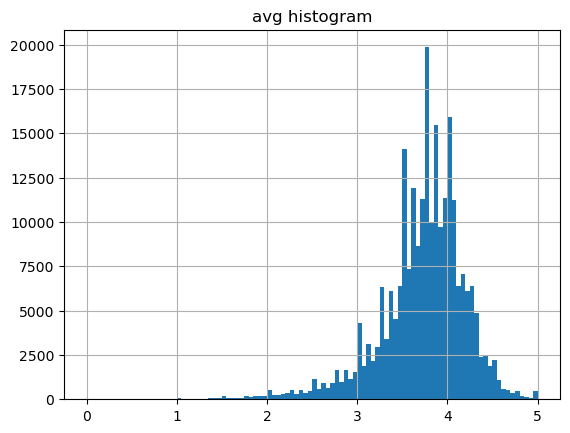

In [21]:
ba_beers_cleaned['avg'].hist(bins = 100)
plt.title('avg histogram')
plt.show()

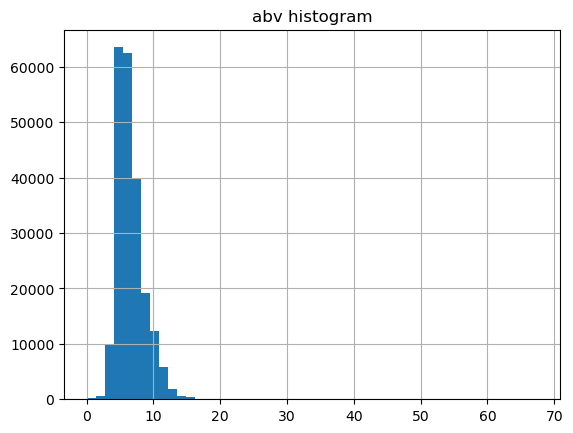

In [27]:
ba_beers_cleaned['abv'].hist(bins = 50)
plt.title('abv histogram')
plt.show()

/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_14894/1616403901.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Score Type', y='Score', palette="Set2")


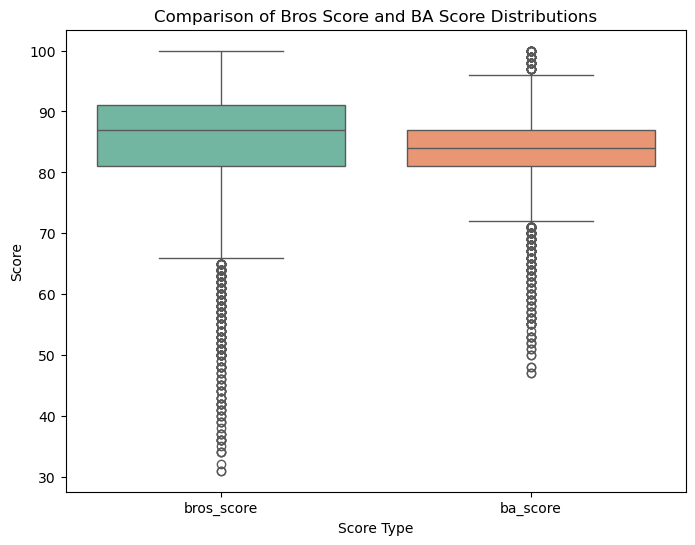

In [31]:

# Drop rows with missing scores to avoid errors
ba_beers_cleaned= ba_beers_cleaned.dropna(subset=['bros_score', 'ba_score'])

df_melted = ba_beers_cleaned[['bros_score', 'ba_score']].melt(var_name='Score Type', value_name='Score')

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_melted, x='Score Type', y='Score', palette="Set2")

plt.xlabel("Score Type")
plt.ylabel("Score")
plt.title("Comparison of Bros Score and BA Score Distributions")

plt.show()


Pearson correlation between ba_score and bros_score: 0.70
P-value: 0.00e+00


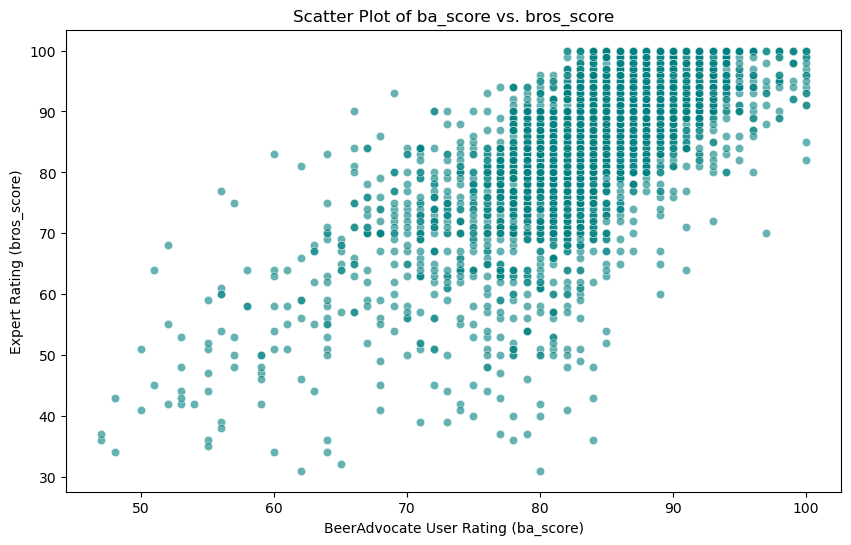

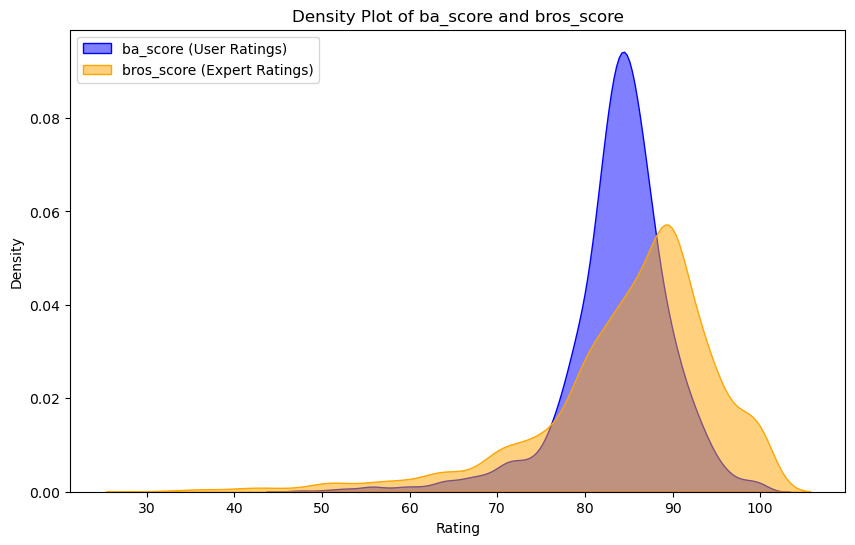

In [44]:
from scipy.stats import pearsonr
ba_beers_babro = ba_beers_cleaned.dropna(subset=['ba_score', 'bros_score'])

# 1. Calculate the Pearson correlation between ba_score and bros_score
correlation, p_value = pearsonr(ba_beers_babro['ba_score'], ba_beers_babro['bros_score'])
print(f"Pearson correlation between ba_score and bros_score: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ba_score', y='bros_score', data=ba_beers_babro, alpha=0.6, color="teal")
plt.title("Scatter Plot of ba_score vs. bros_score")
plt.xlabel("BeerAdvocate User Rating (ba_score)")
plt.ylabel("Expert Rating (bros_score)")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(ba_beers_babro['ba_score'], label='ba_score (User Ratings)', fill=True, color="blue", alpha=0.5)
sns.kdeplot(ba_beers_babro['bros_score'], label='bros_score (Expert Ratings)', fill=True, color="orange", alpha=0.5)
plt.title("Density Plot of ba_score and bros_score")
plt.xlabel("Rating")
plt.legend()
plt.show()


/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_14894/1463545212.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")


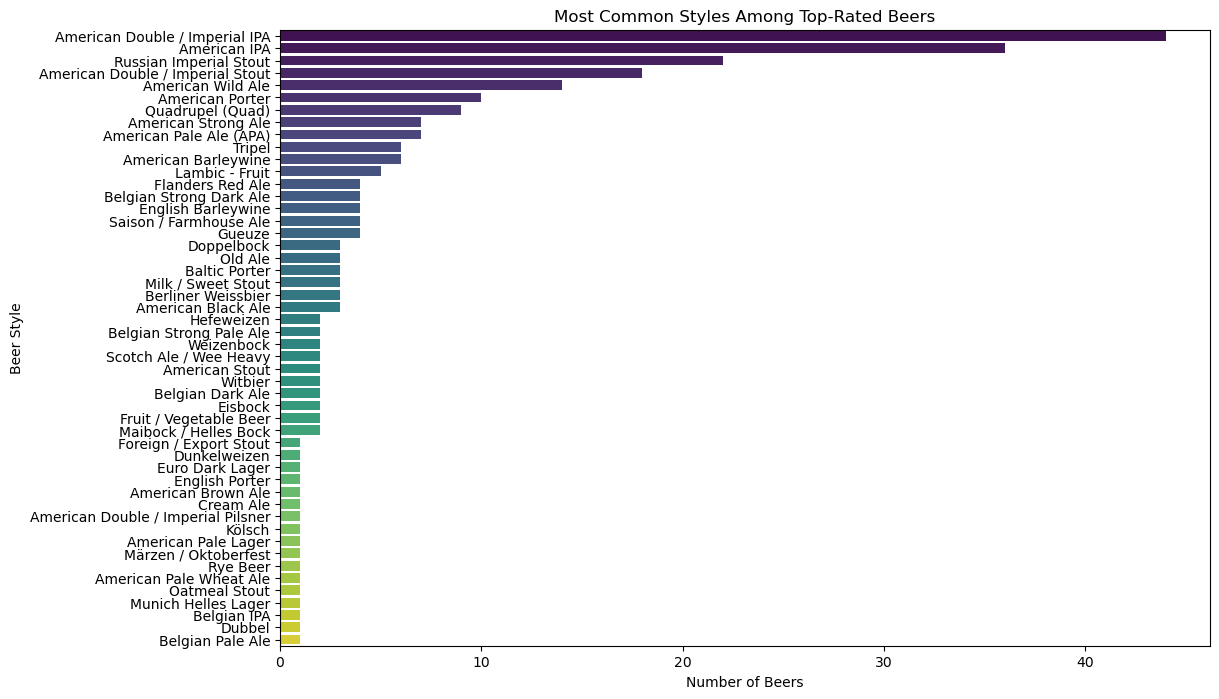

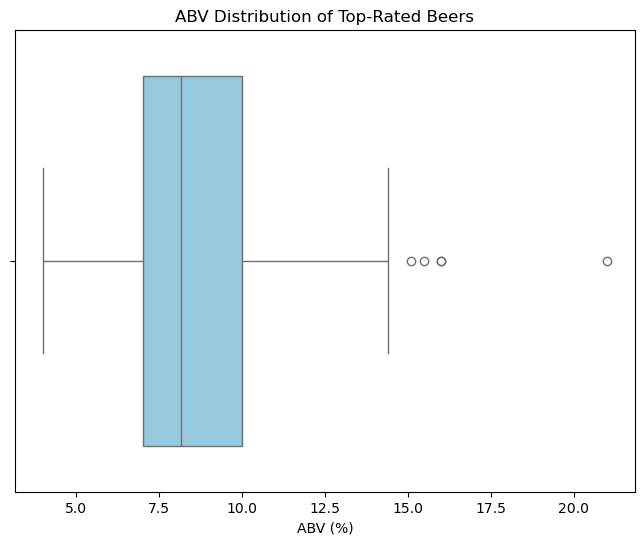

Top 5% ABV Statistics:
 count    256.000000
mean       8.710234
std        2.448106
min        4.000000
25%        7.000000
50%        8.150000
75%       10.000000
max       21.000000
Name: abv, dtype: float64

Top 5% Most Common Styles:
 style
American Double / Imperial IPA      44
American IPA                        36
Russian Imperial Stout              22
American Double / Imperial Stout    18
American Wild Ale                   14
American Porter                     10
Quadrupel (Quad)                     9
American Strong Ale                  7
American Pale Ale (APA)              7
Tripel                               6
Name: count, dtype: int64


In [36]:
#The code identifies the top 5% of beers by setting a rating threshold (top_rated_threshold). 
top_rated_threshold = ba_beers_cleaned['avg'].quantile(0.95)
top_beers = ba_beers_cleaned[ba_beers_cleaned['avg'] >= top_rated_threshold]

style_counts = top_beers['style'].value_counts()

# alcohol analysis
abv_stats = top_beers['abv'].describe()


# Bar plot for styles of top-rated beers
plt.figure(figsize=(12, 8))
sns.barplot(x=style_counts.values, y=style_counts.index, palette="viridis")
plt.title("Most Common Styles Among Top-Rated Beers")
plt.xlabel("Number of Beers")
plt.ylabel("Beer Style")
plt.show()

# Box plot for ABV distribution of top-rated beers
plt.figure(figsize=(8, 6))
sns.boxplot(x=top_beers['abv'], color="skyblue")
plt.title("ABV Distribution of Top-Rated Beers")
plt.xlabel("ABV (%)")
plt.show()


print("Top 5% ABV Statistics:\n", abv_stats)
print("\nTop 5% Most Common Styles:\n", style_counts.head(10))


/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_14894/1991371610.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ba_beers_cleaned_nona, x='avg', y='style', order=style_avg_ratings.index, palette="coolwarm")


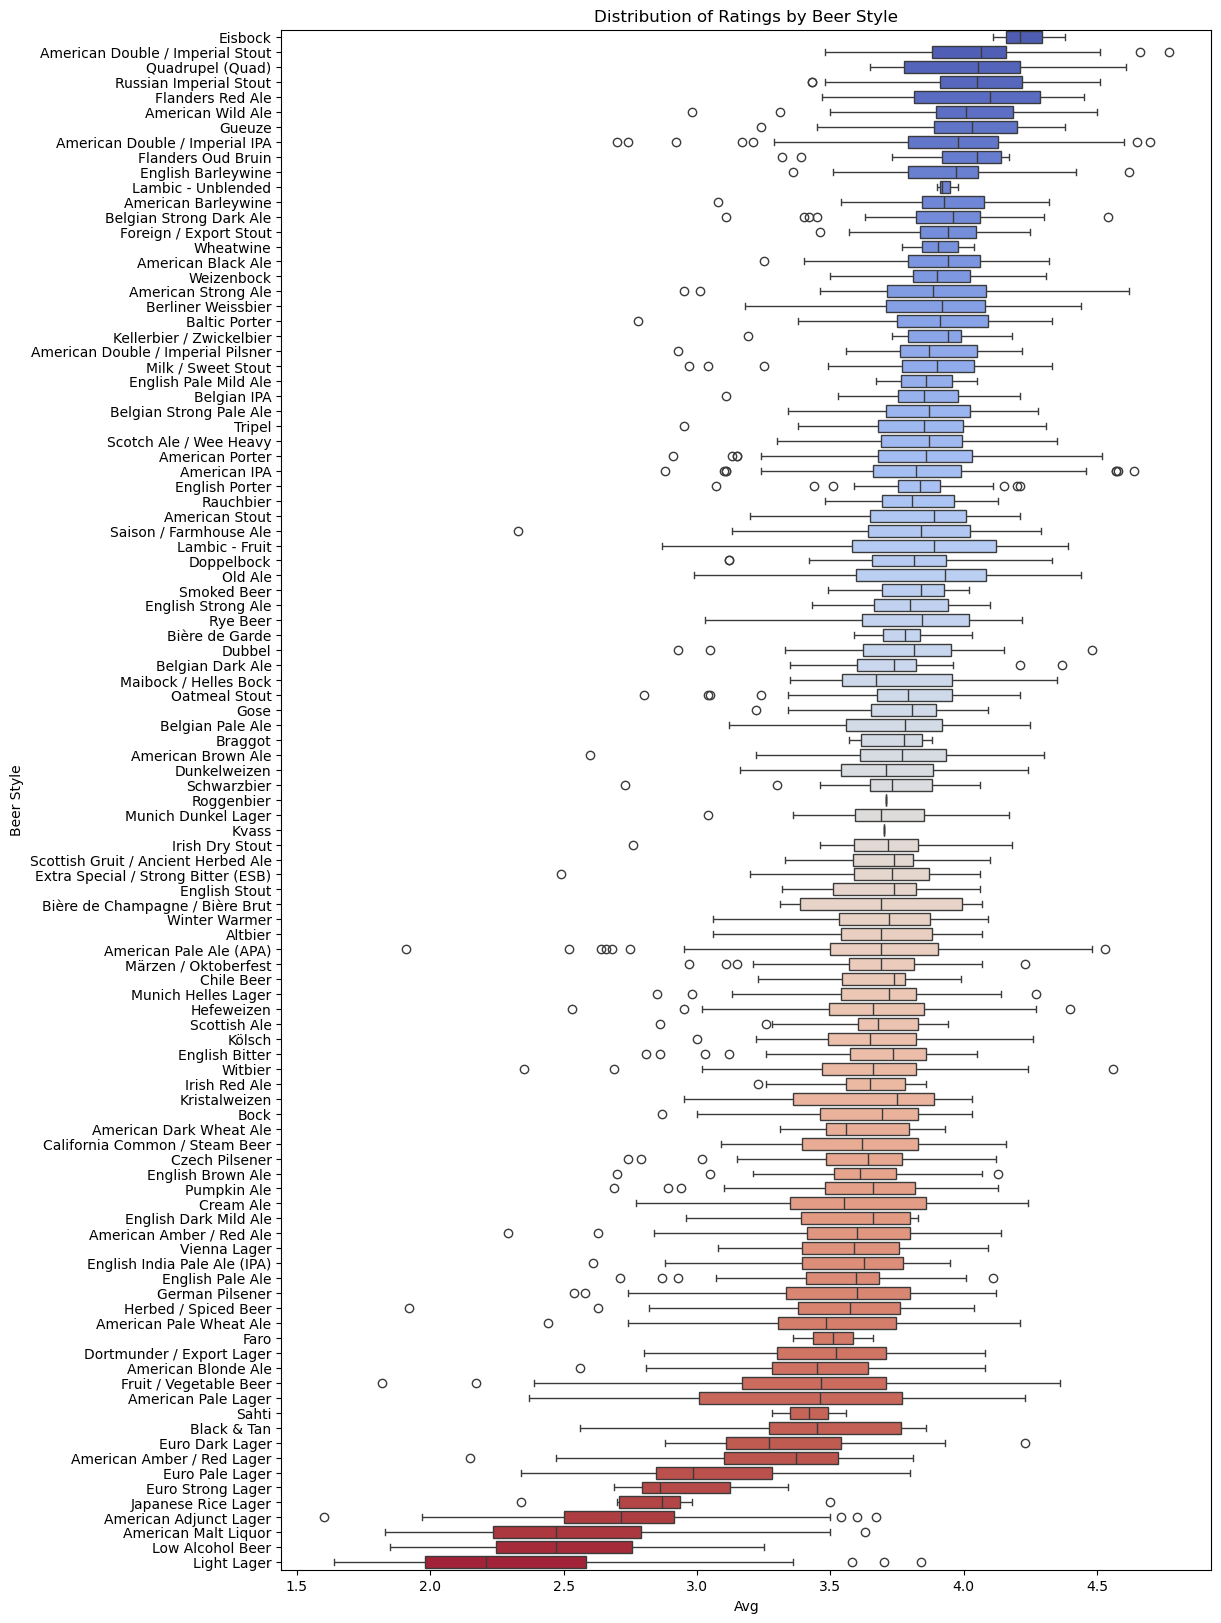

In [39]:
ba_beers_cleaned_nona = ba_beers_cleaned.dropna(subset=['style', 'avg'])

# Calculate the average ratings by style
style_avg_ratings = ba_beers_cleaned_nona.groupby('style')['avg'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 20))
sns.boxplot(data=ba_beers_cleaned_nona, x='avg', y='style', order=style_avg_ratings.index, palette="coolwarm")
plt.title("Distribution of Ratings by Beer Style")
plt.xlabel("Avg")
plt.ylabel("Beer Style")
plt.show()


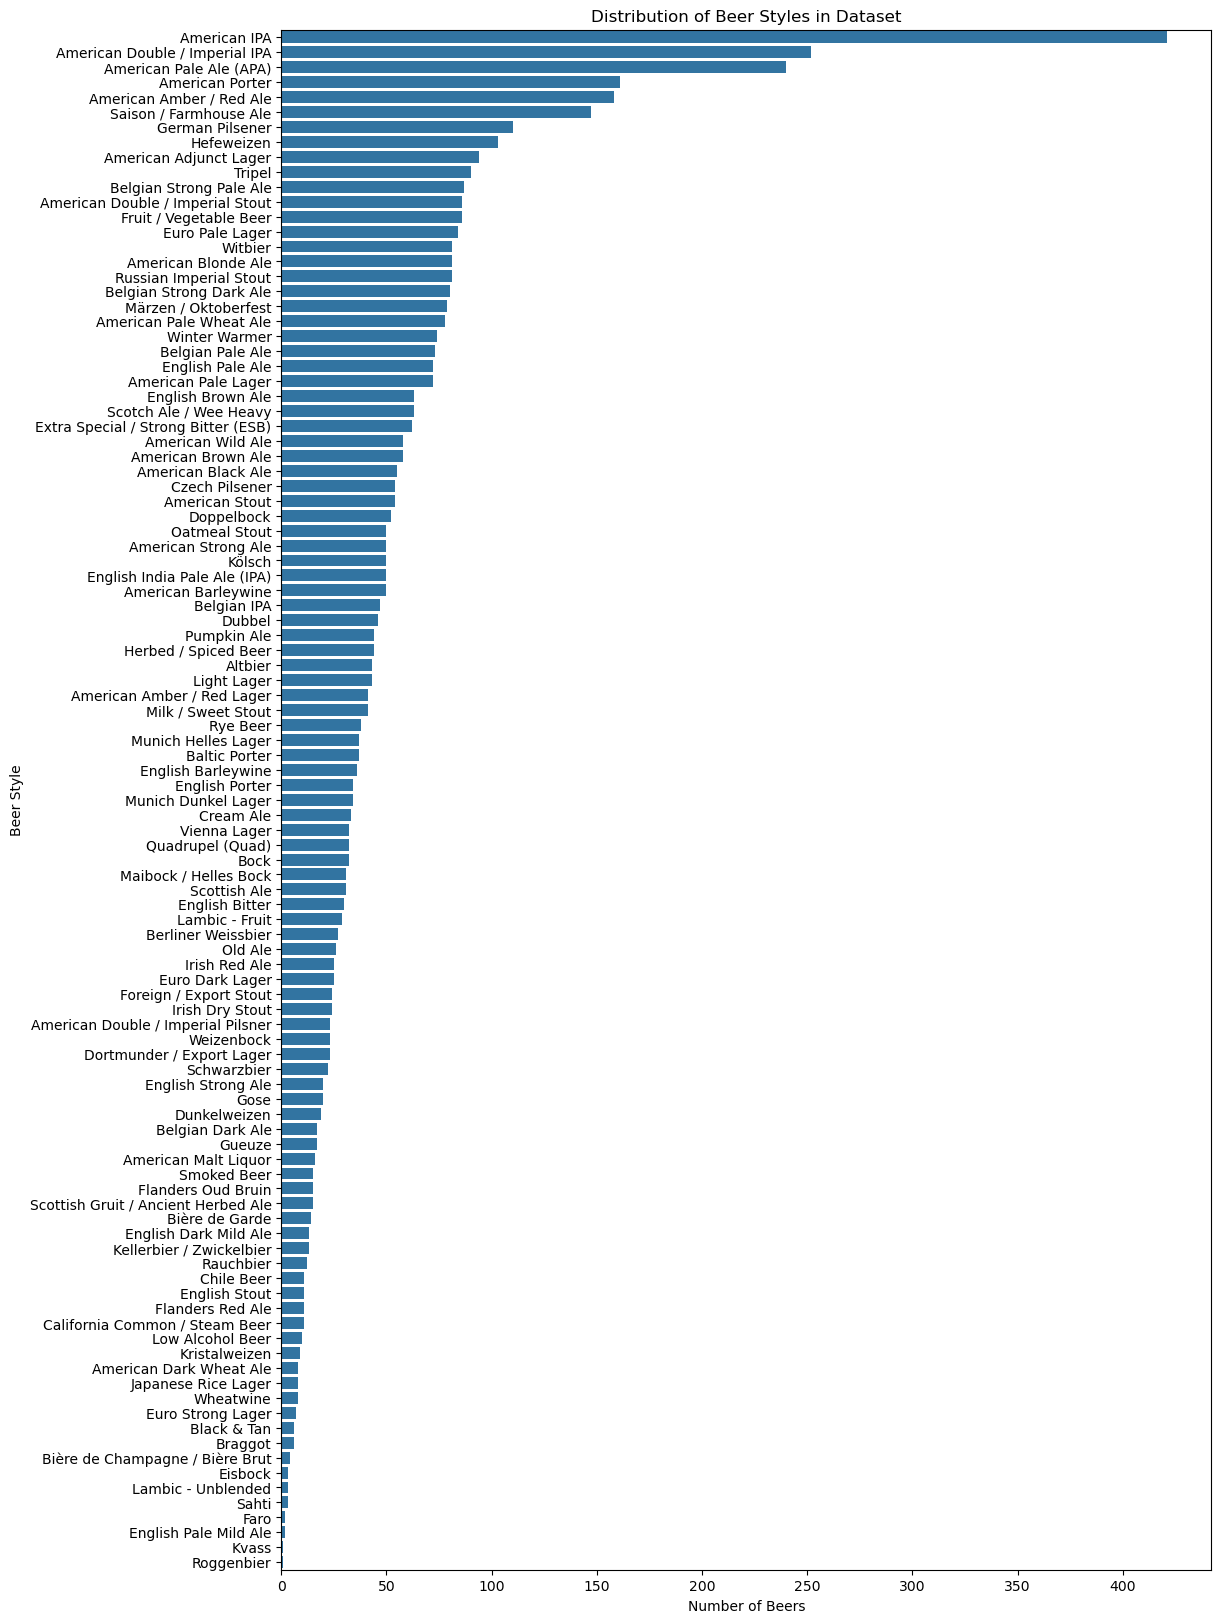

Top 10 Most Common Beer Styles:
 style
American IPA                      421
American Double / Imperial IPA    252
American Pale Ale (APA)           240
American Porter                   161
American Amber / Red Ale          158
Saison / Farmhouse Ale            147
German Pilsener                   110
Hefeweizen                        103
American Adjunct Lager             94
Tripel                             90
Name: count, dtype: int64


In [42]:
style_counts = ba_beers_cleaned['style'].value_counts()

# Visualize the distribution of beer styles
plt.figure(figsize=(12, 20))
sns.barplot(x=style_counts.values, y=style_counts.index)
plt.title("Distribution of Beer Styles in Dataset")
plt.xlabel("Number of Beers")
plt.ylabel("Beer Style")
plt.show()

print("Top 10 Most Common Beer Styles:\n", style_counts.head(10))


In [46]:
#Identify breweries with the highest avg scores or nbr_ratings
ba_brewery = ba_beers_cleaned.dropna(subset=['brewery_name', 'avg', 'nbr_ratings'])

#Calculate the average 'avg' score and total 'nbr_ratings' for each brewery
brewery_stats = ba_brewery.groupby('brewery_name').agg(
    avg_score=('avg', 'mean'),
    total_ratings=('nbr_ratings', 'sum')
).reset_index()

# Find the top 10 breweries by average score
top_breweries_by_score = brewery_stats.sort_values(by='avg_score', ascending=False).head(10)

# Find the top 10 breweries by total number of ratings
top_breweries_by_ratings = brewery_stats.sort_values(by='total_ratings', ascending=False).head(10)

print("Top 10 Breweries by Average Score:")
print(top_breweries_by_score)

print("\nTop 10 Breweries by Number of Ratings:")
print(top_breweries_by_ratings)


Top 10 Breweries by Average Score:
                                           brewery_name  avg_score  \
1065                         Tree House Brewing Company   4.597143   
336                                  Celis Brewery Inc.   4.560000   
1061                   Toppling Goliath Brewing Company   4.480000   
281   Brouwerij Westvleteren (Sint-Sixtusabdij van W...   4.446667   
462                          Fiddlehead Brewing Company   4.440000   
1068                            Triple Crossing Brewing   4.440000   
906                       Russian River Brewing Company   4.404000   
810                              Other Half Brewing Co.   4.390000   
268                            Brouwerij Rodenbach N.V.   4.383333   
730                       Minneapolis Town Hall Brewery   4.350000   

      total_ratings  
1065          11745  
336              21  
1061           4359  
281            9409  
462            1808  
1068             55  
906           24859  
810             90

In [48]:
#Count the unique styles each brewery produces to see if breweries 
#with broader style offerings have higher scores.


# 1. Count unique styles per brewery and calculate average score
brewery_style_stats = ba_brewery.groupby('brewery_name').agg(
    num_styles=('style', 'nunique')   # Count unique styles per brewery
).reset_index()

# Sort by number of unique styles and average score
brewery_style_stats = brewery_style_stats.sort_values(by='num_styles', ascending=False)

# Display the results
print("Breweries with Broad Style Offerings ")
print(brewery_style_stats.head(10))


Breweries with Broad Style Offerings 
                               brewery_name  num_styles
149      Boston Beer Company (Samuel Adams)          50
706  Matt Brewing Company / Saranac Brewery          36
559             Harpoon Brewery & Beer Hall          36
472                      Flying Dog Brewery          34
762              New Glarus Brewing Company          32
696               Magic Hat Brewing Company          32
496  Full Sail Brewery & Tasting Room & Pub          26
813                     Otter Creek Brewing          26
760                     New Belgium Brewing          24
417            Dogfish Head Brewings & Eats          24


Pearson correlation between nbr_reviews and avg score: 0.18
P-value: 7.11e-38


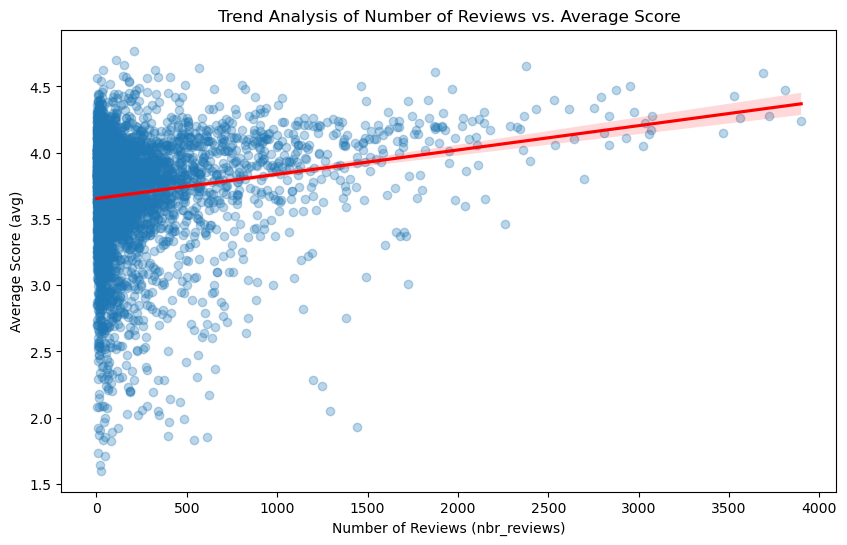

In [50]:
#Investigate if beers with more nbr_reviews tend to have higher or lower avg scores. 
#This can show if popularity influences perception.

# Ensure there are no missing values in 'nbr_reviews' and 'avg'
df = ba_beers_cleaned.dropna(subset=['nbr_reviews', 'avg'])

# Calculate the Pearson correlation between nbr_reviews and avg score
correlation, p_value = pearsonr(df['nbr_reviews'], df['avg'])
print(f"Pearson correlation between nbr_reviews and avg score: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

# Use a regression line to observe any trend
plt.figure(figsize=(10, 6))
sns.regplot(x='nbr_reviews', y='avg', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title("Trend Analysis of Number of Reviews vs. Average Score")
plt.xlabel("Number of Reviews (nbr_reviews)")
plt.ylabel("Average Score (avg)")
plt.show()


Average Number of Reviews per Style:
                              style  avg_nbr_reviews
0                           Eisbock       741.000000
1            Russian Imperial Stout       454.703704
2                  Quadrupel (Quad)       440.531250
3  American Double / Imperial Stout       416.337209
4                   Irish Dry Stout       363.500000
5                       Pumpkin Ale       350.909091
6           Belgian Strong Dark Ale       343.275000
7                           Old Ale       333.115385
8                  Flanders Red Ale       320.000000
9                            Dubbel       317.239130


/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_14894/3693361406.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=style_avg_reviews.head(10), x='avg_nbr_reviews', y='style', palette="magma")


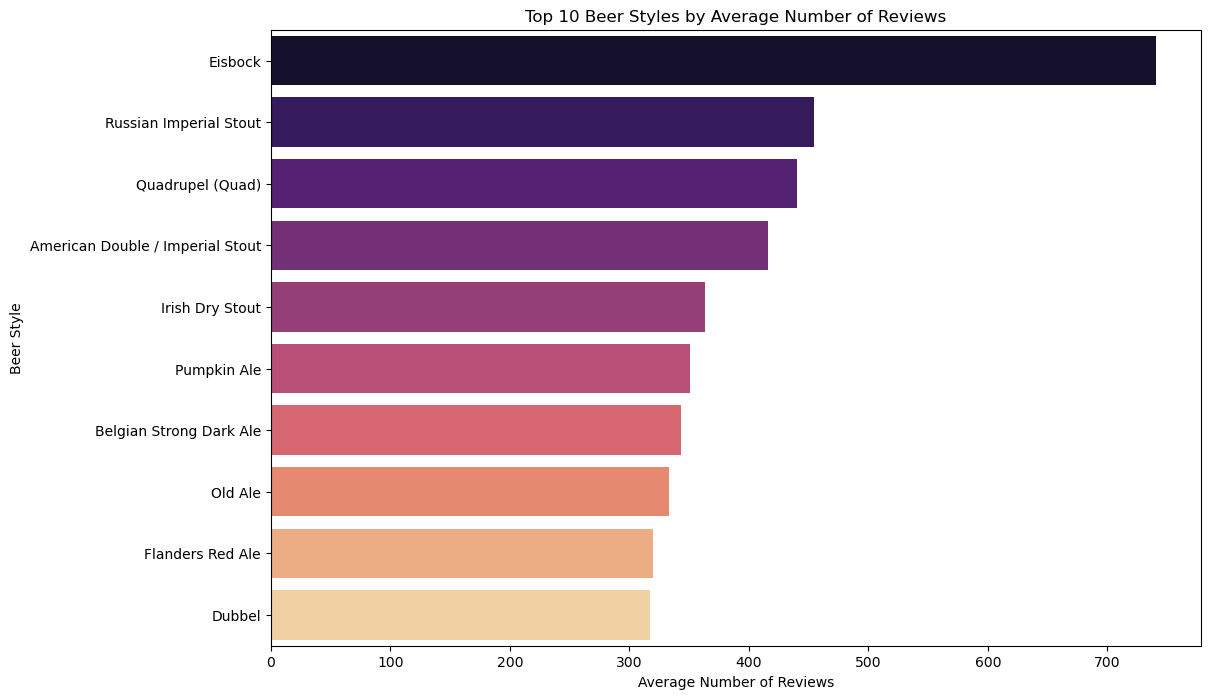

In [52]:
#Investigate if beers with more nbr_reviews tend to have higher or lower avg scores
ba_nbr_style = ba_beers_cleaned.dropna(subset=['style', 'nbr_reviews'])

# Calculate the average number of reviews per style
style_avg_reviews = ba_nbr_style.groupby('style')['nbr_reviews'].mean().sort_values(ascending=False).reset_index()

style_avg_reviews.columns = ['style', 'avg_nbr_reviews']

print("Average Number of Reviews per Style:")
print(style_avg_reviews.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(data=style_avg_reviews.head(10), x='avg_nbr_reviews', y='style', palette="magma")
plt.title("Top 10 Beer Styles by Average Number of Reviews")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Beer Style")
plt.show()


Pearson correlation between zscore and ba_score: 0.90
P-value: 9.07e-242
Pearson correlation between zscore and avg score: 0.95
P-value: 0.00e+00


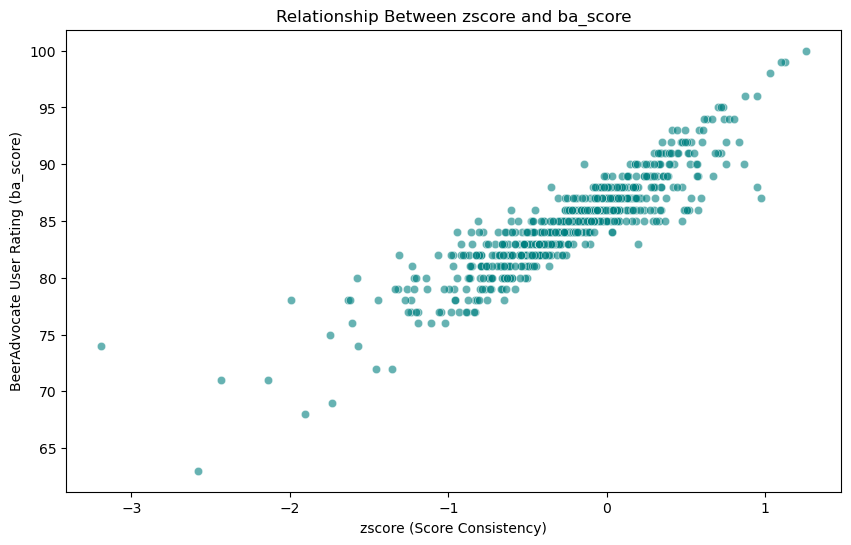

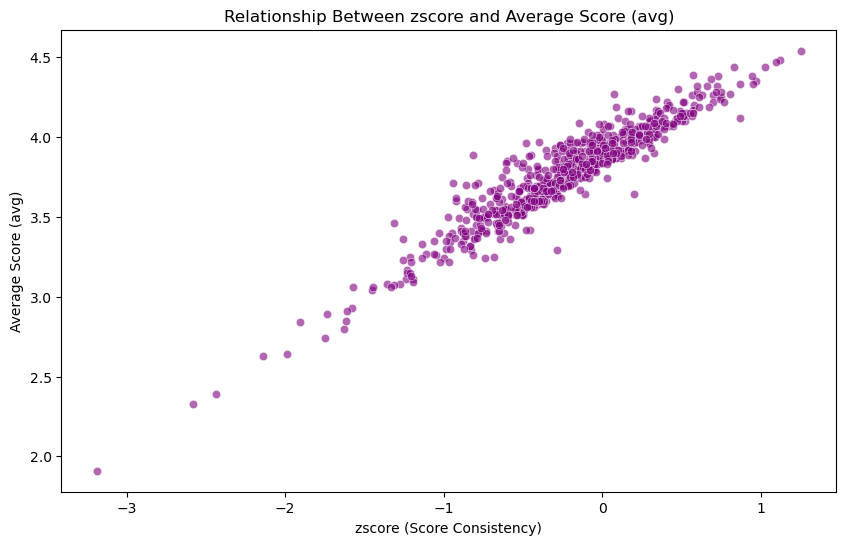

In [53]:
# Use zscore to analyze score consistency across beers. 
#Check if beers with high zscore also have higher ba_score or avg.
ba_zscore = ba_beers_cleaned.dropna(subset=['zscore', 'ba_score', 'avg'])

# Check the correlation between zscore and ba_score / avg
correlation_zscore_ba, p_value_ba = pearsonr(ba_zscore['zscore'], ba_zscore['ba_score'])
correlation_zscore_avg, p_value_avg = pearsonr(ba_zscore['zscore'], ba_zscore['avg'])

print(f"Pearson correlation between zscore and ba_score: {correlation_zscore_ba:.2f}")
print(f"P-value: {p_value_ba:.2e}")
print(f"Pearson correlation between zscore and avg score: {correlation_zscore_avg:.2f}")
print(f"P-value: {p_value_avg:.2e}")

# visualize the relationship between zscore and ba_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zscore', y='ba_score', data=ba_zscore, alpha=0.6, color="teal")
plt.title("Relationship Between zscore and ba_score")
plt.xlabel("zscore (Score Consistency)")
plt.ylabel("BeerAdvocate User Rating (ba_score)")
plt.show()

# visualize the relationship between zscore and avg score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zscore', y='avg', data=ba_zscore, alpha=0.6, color="purple")
plt.title("Relationship Between zscore and Average Score (avg)")
plt.xlabel("zscore (Score Consistency)")
plt.ylabel("Average Score (avg)")
plt.show()


Pearson correlation between abv and avg score: 0.45
P-value: 9.07e-239
Pearson correlation between abv and ba_score: 0.44
P-value: 2.69e-228


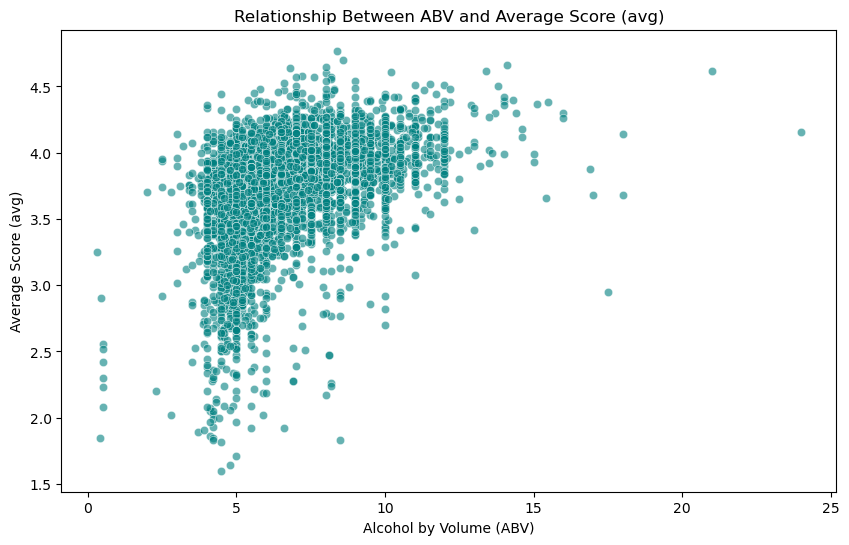

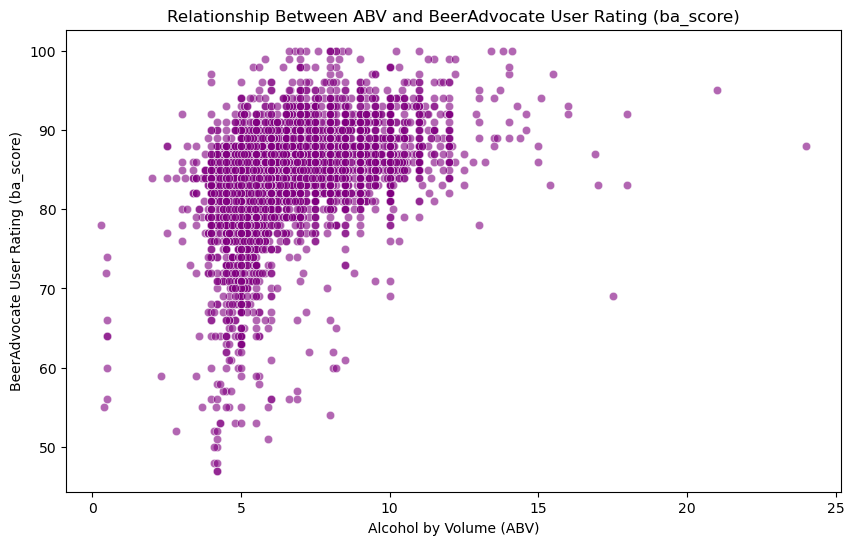

In [54]:
#Examine if there's a relationship between abv and avg or ba_score. 
#This could reveal if higher ABV beers generally have higher ratings.

ba_abv = ba_beers_cleaned.dropna(subset=['abv', 'avg', 'ba_score'])

#Check the correlation between abv and avg score / ba_score
correlation_abv_avg, p_value_abv_avg = pearsonr(ba_abv['abv'], ba_abv['avg'])
correlation_abv_ba, p_value_abv_ba = pearsonr(ba_abv['abv'], ba_abv['ba_score'])

print(f"Pearson correlation between abv and avg score: {correlation_abv_avg:.2f}")
print(f"P-value: {p_value_abv_avg:.2e}")
print(f"Pearson correlation between abv and ba_score: {correlation_abv_ba:.2f}")
print(f"P-value: {p_value_abv_ba:.2e}")

# 2. Scatter plot to visualize the relationship between abv and avg score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='abv', y='avg', data=ba_abv, alpha=0.6, color="teal")
plt.title("Relationship Between ABV and Average Score (avg)")
plt.xlabel("Alcohol by Volume (ABV)")
plt.ylabel("Average Score (avg)")
plt.show()

# 3. Scatter plot to visualize the relationship between abv and ba_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='abv', y='ba_score', data=ba_abv, alpha=0.6, color="purple")
plt.title("Relationship Between ABV and BeerAdvocate User Rating (ba_score)")
plt.xlabel("Alcohol by Volume (ABV)")
plt.ylabel("BeerAdvocate User Rating (ba_score)")
plt.show()



/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_14894/1662075594.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='style', y='abv', data=ba_b, palette="Set2")


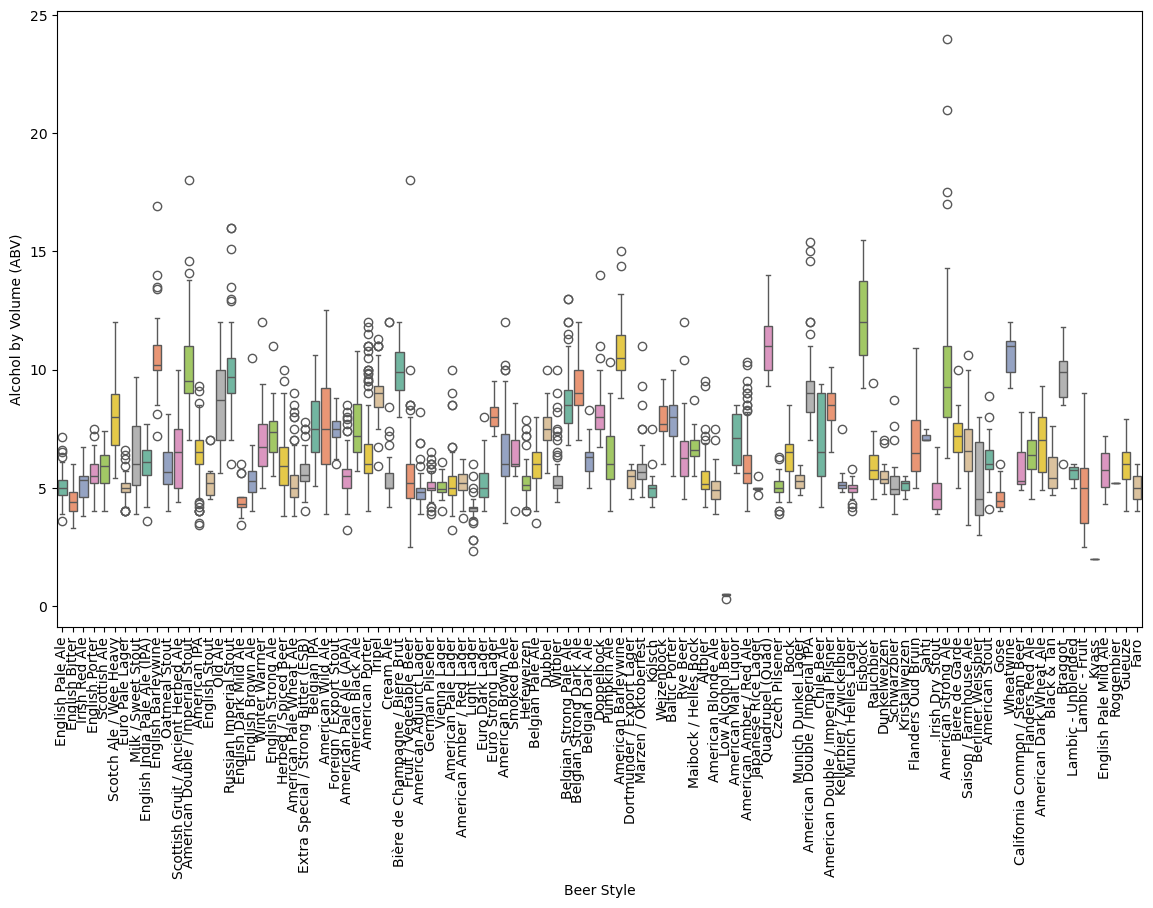

/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_14894/1662075594.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brewery_name', y='abv', data=df_top_breweries, palette="Set1")


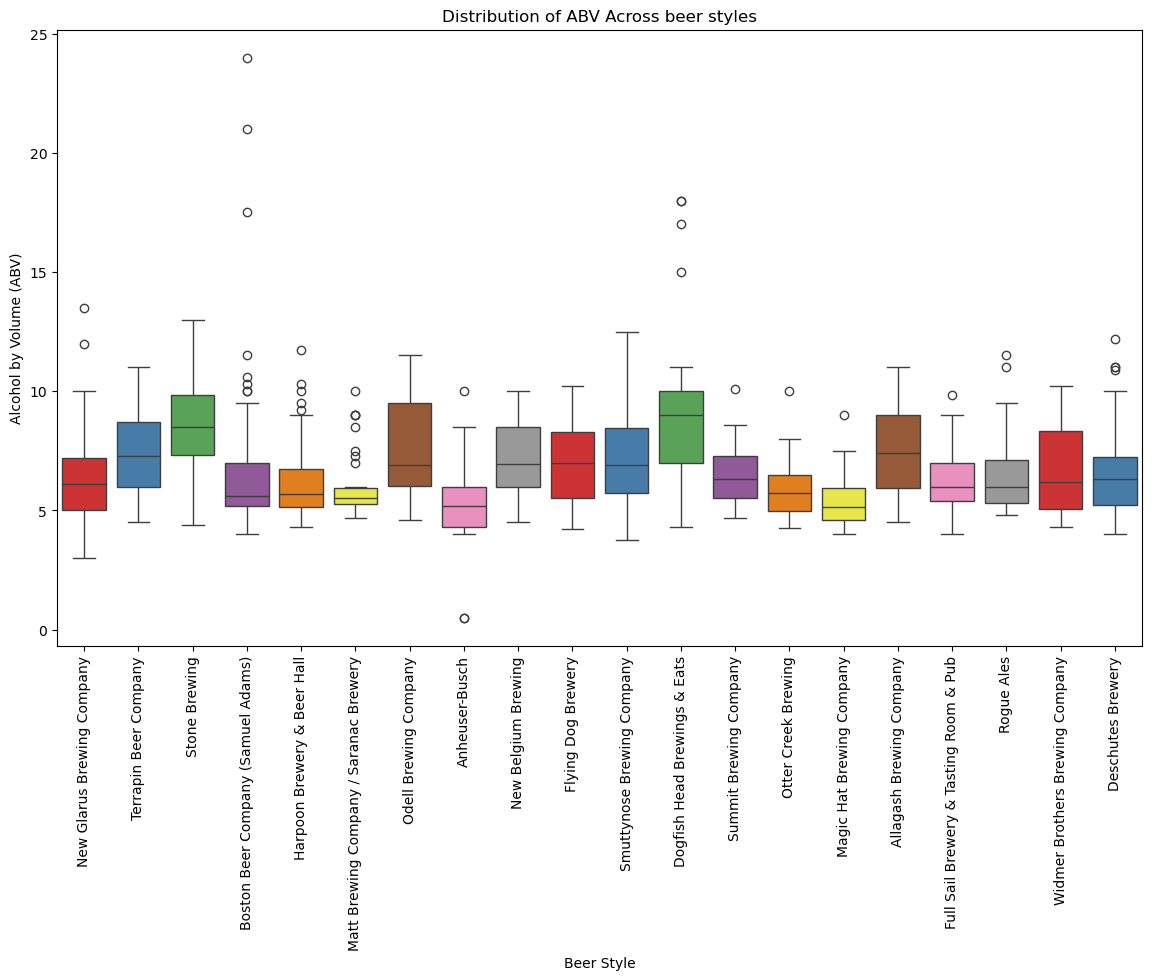

In [59]:
#Plot the distribution of ABV across styles and breweries to see if certain styles or breweries tend to produce stronger beers.

ba_b = ba_beers_cleaned.dropna(subset=['abv', 'style', 'brewery_name'])

# 1. Box plot of ABV across different beer styles
plt.figure(figsize=(14, 8))
sns.boxplot(x='style', y='abv', data=ba_b, palette="Set2")
plt.xticks(rotation=90)  # Rotate x labels to fit style names

plt.xlabel("Beer Style")
plt.ylabel("Alcohol by Volume (ABV)")
plt.show()

# 2. Box plot of ABV across different breweries
# You can limit to top N breweries to avoid overcrowding the plot
top_breweries = ba_b['brewery_name'].value_counts().head(20).index
df_top_breweries = ba_b[ba_b['brewery_name'].isin(top_breweries)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='brewery_name', y='abv', data=df_top_breweries, palette="Set1")
plt.xticks(rotation=90)  # Rotate x labels to fit brewery names
plt.title("Distribution of ABV Across beer styles") 
plt.xlabel("Beer Style")
plt.ylabel("Alcohol by Volume (ABV)")
plt.show()

